<h1 style = "text-align:center"> <strong>Artificial Neural Network </strong></h1>

<h2 style = "text-align:center"> People Detection </h2>

<h5 style = "text-align:center"> Authors: <a href="https://github.com/AlvaroVasquezAI">Álvaro García Vásquez</a>, <a href="#">Luis Alfredo Cuamatzi Flores</a> and <a href="#">Fernando Daniel Portilla Posadas</a> </h5>


<h2 style="text-align:center">Overview</h2>

<p style="text-align:justify">
    In the realm of computer vision, the detection of human figures within complex environments stands as a pivotal challenge, particularly with the rapid evolution of AI capabilities. This notebook presents a comprehensive exploration and implementation of an Artificial Neural Network (ANN) designed specifically for the task of detecting people within urban scenes, a critical application in areas such as surveillance, autonomous driving, and pedestrian tracking.
</p>

<p style="text-align:justify">
    The core of this project lies in the development and training of a sophisticated neural network model that can accurately distinguish between images containing people and those that do not. By leveraging a dataset meticulously compiled for this purpose, which includes various urban scenarios, we aim to refine our model's ability to generalize across different settings and conditions. This involves the use of advanced image processing techniques and neural network architectures to handle the complexities of real-world visual data.
</p>

<p style="text-align:justify">
    Throughout this document, we will delve into the dataset preparation, feature extraction, model training, and validation processes. We will also discuss the selection of hyperparameters and the use of cross-validation techniques to ensure the robustness and effectiveness of our model. Finally, the notebook will demonstrate the application of this model within a practical setting, showcasing its potential to impact real-world applications.
</p>


<div>
    <h2><strong>Table of Contents</strong></h2>
    <ol>
        <li><a href="#dataset">Dataset</a></li>
        <li><a href="#labeling">Labeling Images</a></li>
        <li><a href="#features">Image Features</a></li>
        <li><a href="#splitting">Data Splitting and Cross-Validation</a></li>
        <li><a href="#hyperparameters">Finding the Best Hyperparameters for the ANN</a></li>
        <li><a href="#training">Training Methodology</a></li>
        <li><a href="#model-training">Training Model</a></li>
        <li><a href="#using-app">Using the Model (App)</a></li>
        <li><a href="#results-app">Results Using the App</a></li>
    </ol>
</div>


<h2 style = 'text-align:center' id="dataset"><strong>Dataset</strong></h2>

We created a dataset with 100 images of the city with people and animals, and 100 images of the city with animals but without people. After that, we split the dataset into four categories: Absent, Animal, Noise, and People (A, N, Noise, P). This was done with a program that divides each image into 128x128 grids, manually labeling each grid as A, N, Noise, or P. The program saves the grids in the corresponding folder. We also created a file .csv for both folders V1 and V2. Each file .csv contains NumberOfImage, NumberOfGrid, Class and TypeOfFile of each grid.

<strong>Features:</strong>
- Size: 1024x1024 pixels
- Format: PNG
- Channels: RGB
- Images generated with Artificial Intelligence

<strong>Folder structure before splitting the dataset:</strong>
- dataset
    - V1 (with people and animals)
        - 1.png
        - 2.png
        - ...
        - 100.png
    - V2 (without people but with animals)
        - 1.png
        - 2.png
        - ...
        - 100.png

<strong> Folder structure after splitting the dataset: </strong>
- dataset
    - V1 (with people and animals)
        - output
            - A (Absent)
                - grid_V1_numberOfImage_numberOfGrid_A.png
                - ...
            - N (Animal)
                - grid_V1_numberOfImage_numberOfGrid_N.png
                - ...
            - Noise (Noise)
                - grid_V1_numberOfImage_numberOfGrid_Noise.png
                - ...
            - P (People)
                - grid_V1_numberOfImage_numberOfGrid_P.png
        - 1.png
        - 2.png
        - ...
        - 100.png
    - V2 (without people but with animals)
        - output
            - A (Absent)
                - grid_V2_numberOfImage_numberOfGrid_A.png
                - ...
            - N (Animal)
                - grid_V2_numberOfImage_numberOfGrid_N.png
                - ...
            - Noise (Noise)
                - grid_V2_numberOfImage_numberOfGrid_Noise.png
                - ...
            - P (People)
                - grid_V2_numberOfImage_numberOfGrid_P.png
        - 1.png
        - 2.png
        - ...
        - 100.png


<h3 style = 'text-align:center'> <strong>Dataset</strong></h3>
<div style = "display: flex; justify-content: space-around;">
    <div style = "width: 30%">
        <img src = "resources/images/v1Example.png" style = "width: 50%, center;"/>
        <p style = "text-align: center;"> <strong>Version 1</strong> </p>
    </div>
    <div style = "width: 30%">
        <img src = "resources/images/v2Example.png" style = "width: 50% center;"/>
        <p style = "text-align: center;"> <strong>Version 2</strong> </p>
    </div>
</div>



<h2 style='text-align:center' id="labeling"> <strong>2. Labeling images:</strong> </h2>
<img src="resources/images/UI.png" alt="UI" style = "display:block; margin-left:auto; margin-right:auto; width:100%;">

<h2 style='text-align:center' id="features"> <strong>3. Image features:</strong> </h2>

<table style='border: 1px solid black; width: 100%'>
<thead>
    <tr>
        <th style='border: 1px solid black; padding: 8px; text-align: left;'>Feature</th>
        <th style='border: 1px solid black; padding: 8px; text-align: left;'>Description</th>
        <th style='border: 1px solid black; padding: 8px; text-align: left;'>Justification for Neural Network Training</th>
    </tr>
</thead>
<tbody>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>Color Channels (R, G, B)</td>
        <td style='border: 1px solid black; padding: 8px;'>Intensity values for red, green, and blue channels in the image.</td>
        <td style='border: 1px solid black; padding: 8px;'>Fundamental for capturing visual features, crucial for identifying elements like clothing or skin tones.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>RGB Mean</td>
        <td style='border: 1px solid black; padding: 8px;'>Average of the RGB values across the image.</td>
        <td style='border: 1px solid black; padding: 8px;'>Provides a baseline color metric, useful for color normalization and background differentiation.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>RGB Mode</td>
        <td style='border: 1px solid black; padding: 8px;'>Most frequent RGB values in the image.</td>
        <td style='border: 1px solid black; padding: 8px;'>Identifies dominant colors which can signify important features within the scene.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>RGB Variance</td>
        <td style='border: 1px solid black; padding: 8px;'>Measure of the spread of RGB values.</td>
        <td style='border: 1px solid black; padding: 8px;'>Useful for understanding color diversity, which might indicate areas of interest or changes in scene content.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>RGB Standard Deviation</td>
        <td style='border: 1px solid black; padding: 8px;'>Standard deviation of RGB values.</td>
        <td style='border: 1px solid black; padding: 8px;'>Highlights areas with high color variability, important for detecting edges and contours.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>Color Histogram</td>
        <td style='border: 1px solid black; padding: 8px;'>Distribution of pixel intensities in color channels.</td>
        <td style='border: 1px solid black; padding: 8px;'>Essential for analyzing the color distribution and for segmenting images based on color intensity.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>Gray Level Co-occurrence Matrix Properties</td>
        <td style='border: 1px solid black; padding: 8px;'>Statistical features extracted from how often different combinations of pixel brightness values (gray levels) occur in an image.</td>
        <td style='border: 1px solid black; padding: 8px;'>Provides textural features which are critical for recognizing patterns and structures within images that might not be visible through color alone.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>Histogram of Oriented Gradients (HOG)</td>
        <td style='border: 1px solid black; padding: 8px;'>Counts occurrences of gradient orientation in localized portions of an image.</td>
        <td style='border: 1px solid black; padding: 8px;'>Effective for object detection in vision tasks, particularly useful for detecting human forms in various poses and lighting conditions.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>Peak Local Max</td>
        <td style='border: 1px solid black; padding: 8px;'>Identifies local maxima in an image, points where the region around a pixel has lower intensity values.</td>
        <td style='border: 1px solid black; padding: 8px;'>Helps to detect key points, which are essential for tasks like feature matching and scene understanding.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>Hu Moments</td>
        <td style='border: 1px solid black; padding: 8px;'>Statistical moments derived from shapes within an image, invariant to image scale, rotation, and reflection.</td>
        <td style='border: 1px solid black; padding: 8px;'>Can uniquely identify different shapes and textures in the image, useful for classification tasks.</td>
    </tr>
</tbody>
</table>

<h3> <strong>Class to extract features:</strong> </h3>

In [1]:
import numpy as np # type: ignore
import skimage.feature # type: ignore 
import skimage.measure # type: ignore
import skimage.filters # type: ignore
import matplotlib.pyplot as plt # type: ignore
import cv2  # type: ignore
import os 
import pandas as pd # type: ignore
import joblib # type: ignore
import skimage # type: ignore
from sklearn.neural_network import MLPClassifier # type: ignore
from sklearn.preprocessing import StandardScaler, LabelEncoder # type: ignore
from sklearn.metrics import classification_report, confusion_matrix # type: ignore
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate # type: ignore
from sklearn.metrics import roc_curve, auc # type: ignore
from sklearn.metrics import precision_recall_curve # type: ignore
from itertools import product # type: ignore

In [2]:
class Image:
    def __init__(self, image, name): 
        self.image = self.setImage(image)
        self.name = self.setName(name)
        self.numberOfGrid = self.setNumberOfGrid(name)
        self.numberOfImageBelonging = self.setNumberOfImageBelonging(name)
        self.datasetBelonging = self.setDatasetBelonging(name)
        self.classBelonging = self.setClassBelonging(name)
        self.size = self.setSize(image)
        
        self.colorChannelsRGB = self.extractColorChannelsRGB()
        self.RGBMean = self.calculateRGBMean()
        self.RGBMode = self.calculateRGBMode()
        self.RGBVariance = self.calculateRGBVariance()
        self.RGBStandardDeviation = self.calculateRGBStandardDeviation()
        self.colorHistogram = self.calculateColorHistogram()

        self.grayLevelCooccurrenceMatrixProperties = self.calculateGrayLevelCooccurrenceMatrixProperties()
        self.histogramOfOrientedGradients = self.calculateHistogramOfOrientedGradients()
        self.peakLocalMax = self.calculatePeakLocalMax()
        self.huMoments = self.getHuMoments()

    def setImage(self, image):
        return image
    
    def setName(self, name):
        return name
    
    def setNumberOfGrid(self, name):
        return name.split("_")[3]
    
    def setNumberOfImageBelonging(self, name):
        return name.split("_")[2]
    
    def setDatasetBelonging(self, name):
        return name.split("_")[1]
    
    def setClassBelonging(self, name):
        return name.split("_")[4]
    
    def setSize(self, image):
        return image.shape
     
    def extractColorChannelsRGB(self):
        redChannel = self.image[:,:,0]
        greenChannel = self.image[:,:,1]
        blueChannel = self.image[:,:,2]

        return [redChannel, greenChannel, blueChannel]
    
    def calculateRGBMean(self):
        redChannel = self.image[:,:,0]
        greenChannel = self.image[:,:,1]
        blueChannel = self.image[:,:,2]
        redMean = np.mean(redChannel)
        greenMean = np.mean(greenChannel)
        blueMean = np.mean(blueChannel) 

        return [redMean, greenMean, blueMean]
    
    def calculateRGBMode(self):
        redChannel = self.image[:,:,0]
        greenChannel = self.image[:,:,1]
        blueChannel = self.image[:,:,2]
        redMode = skimage.exposure.histogram(redChannel)[1].argmax()
        greenMode = skimage.exposure.histogram(greenChannel)[1].argmax()
        blueMode = skimage.exposure.histogram(blueChannel)[1].argmax()

        return [redMode, greenMode, blueMode]
    
    def calculateRGBVariance(self):
        redChannel = self.image[:,:,0]
        greenChannel = self.image[:,:,1]
        blueChannel = self.image[:,:,2]
        redVariance = np.var(redChannel.flatten())
        greenVariance = np.var(greenChannel.flatten())
        blueVariance = np.var(blueChannel.flatten())

        return [redVariance, greenVariance, blueVariance]
    
    def calculateRGBStandardDeviation(self):
        redChannel = self.image[:,:,0]
        greenChannel = self.image[:,:,1]
        blueChannel = self.image[:,:,2]
        redStandardDeviation = np.std(redChannel)
        greenStandardDeviation = np.std(greenChannel)
        blueStandardDeviation = np.std(blueChannel)

        return [redStandardDeviation, greenStandardDeviation, blueStandardDeviation]
    
    def calculateColorHistogram(self):
        image = self.image
        bins = 256
        histogram = [cv2.calcHist([image], [i], None, [bins], [0, 256]) for i in range(3)]
        histogram = [cv2.normalize(hist, hist).flatten() for hist in histogram]

        return histogram

    def calculateGrayLevelCooccurrenceMatrixProperties(self):
        image_gray = skimage.color.rgb2gray(self.image)
        image_gray_u8 = (image_gray * 255).astype(np.uint8)
        glcm = skimage.feature.graycomatrix(image_gray_u8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        contrast = skimage.feature.graycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = skimage.feature.graycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = skimage.feature.graycoprops(glcm, 'homogeneity')[0, 0]
        energy = skimage.feature.graycoprops(glcm, 'energy')[0, 0]
        correlation = skimage.feature.graycoprops(glcm, 'correlation')[0, 0]

        return [contrast, dissimilarity, homogeneity, energy, correlation]

    def calculateHistogramOfOrientedGradients(self):
        image_gray = skimage.color.rgb2gray(self.image)

        return skimage.feature.hog(image_gray, pixels_per_cell=(16, 16), cells_per_block=(1, 1), orientations=9, visualize=False)

    def calculatePeakLocalMax(self):
        image_gray = skimage.color.rgb2gray(self.image)

        return skimage.feature.peak_local_max(image_gray, min_distance=1, threshold_abs=0.1, num_peaks=10)
    
    def getHuMoments(self):
        image_gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        image_gray = cv2.GaussianBlur(image_gray, (5, 5), 0)
        _, image_gray = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        moments = cv2.moments(image_gray)
        huMoments = cv2.HuMoments(moments)

        return huMoments
    
    def generateFeatureVector(self):
        featureVector = np.array([])

        featureVector = np.append(featureVector, self.RGBMean)
        featureVector = np.append(featureVector, self.RGBMode)
        featureVector = np.append(featureVector, self.RGBVariance)
        featureVector = np.append(featureVector, self.RGBStandardDeviation)
        featureVector = np.append(featureVector, np.concatenate([ histogram.flatten() for histogram in self.colorHistogram ]))
        featureVector = np.append(featureVector, self.grayLevelCooccurrenceMatrixProperties)
        featureVector = np.append(featureVector, self.histogramOfOrientedGradients)
        featureVector = np.append(featureVector, self.peakLocalMax)
        featureVector = np.append(featureVector, self.huMoments)
        
        return featureVector

<h3> <strong>Vector of features:</strong> </h3>

The vector of features is composed of the following features:
- RGB Mean
- RGB Mode
- RGB Variance
- RGB Standard Deviation
- Color Histogram
- Gray Level Co-occurrence Matrix Properties
- Histogram of Oriented Gradients (HOG)
- Peak Local Max
- Hu Moments


<h2 style="text-align: center" id="splitting"><strong>4. Data splitting and cross-validation</strong></h2>
<p>
    To ensure that our artificial neural network model generalizes well to new, unseen data, it is crucial to implement an effective data splitting and validation strategy. Below, we will explain how we will divide the data and how we will employ cross-validation to assess the performance of our model.
</p>

<h3>Data Splitting into training and testing sets</h3>
<p>
    First, we will divide our dataset into two segments: training and testing. We will use 80% of the data for training and the remaining 20% for testing. This split will be done in a stratified manner to maintain the proportion of classes in both sets, which is crucial in cases where there is class imbalance:
</p>
<ul>
    <li><strong>train_test_split</strong> is a function from scikit-learn that randomizes and splits the data according to specified parameters.</li>
    <li><strong>test_size=0.2</strong> indicates that 20% of the dataset is reserved for testing.</li>
    <li><strong>random_state=42</strong> ensures that the results are reproducible.</li>
    <li><strong>stratify=y</strong> ensures that the class proportions are consistent between the training and testing sets.</li>
</ul>

<h3>Cross-validation</h3>
<p>
    After splitting the data, we will implement cross-validation to assess the robustness of the model. Cross-validation is a technique that allows for the evaluation of the model's ability to generalize to an independent dataset. Specifically, we will use 5-fold cross-validation, which involves dividing the complete training set into five parts.
</p>
<ul>
    <li><strong>cv=5</strong> specifies that we want a 5-fold cross-validation.</li>
    <li><strong>cross_validate</strong> assesses the model on each fold configuration and returns the results for multiple evaluation metrics.</li>
    <li><strong>return_train_score=True</strong> indicates that we also want to observe the model's performance on the training set for each fold, which can help identify if there is overfitting.</li>
</ul>

<h3>Benefits of cross-validation</h3>
<ul>
    <li><strong>Robustness:</strong> By using multiple subdivisions of the dataset, cross-validation helps ensure that the model is robust and generalizes well beyond a single training/testing split.</li>
    <li><strong>Efficient data utilization:</strong> By rotating training and testing sets, each observation is used for both training and validation, thus maximizing the use of the available data.</li>
</ul>
<p>
    This approach will allow us not only to fine-tune the model parameters more effectively but also to provide a more accurate and reliable estimate of the model's performance.
</p>


In [3]:
def load_images_with_classes(path):
    data = []
    for class_name in os.listdir(path):
        if class_name != "Noise" and not class_name.endswith((".csv", ".DS_Store")):
            for image_name in os.listdir(os.path.join(path, class_name)):
                image = skimage.io.imread(os.path.join(path, class_name, image_name))
                img_obj = Image(image, image_name)
                data.append((img_obj, class_name))
    return data

def prepare_dataset(data_paths):
    data = []
    for path in data_paths:
        data.extend(load_images_with_classes(path))

    # Filter out some instances of class A to address class imbalance
    data = [(img, cls) for img, cls in data if cls != "A" or np.random.rand() < 0.33]

    print("Calculating feature vectors...")
    feature_vectors, classes = zip(*data)
    feature_vectors = [np.array(img.generateFeatureVector()) for img in feature_vectors]

    df = pd.DataFrame({'FeatureVector': feature_vectors, 'Class': classes})

    X = df['FeatureVector'].values
    X = [np.array(x) for x in X]
    y = df['Class'].values

    le = LabelEncoder()
    y = le.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, le, df

def perform_cross_validation(model, X, y, cv=5):
    results = cross_validate(model, X, y, cv=cv, return_train_score=True)
    testAccuracy = np.mean(results['test_score'])
    trainAccuracy = np.mean(results['train_score'])
    
    return testAccuracy, trainAccuracy

def evaluate_model(model, X_test, y_test, le):
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred, target_names=le.inverse_transform([0, 1, 2])), confusion_matrix(y_test, y_pred)


<h2 style='text-align:center' id='hyperparameters'> <strong>5. Finding the best hyperparameters for the ANN</strong> </h2>

Calculating feature vectors...


c:\Users\alvar\anaconda3\envs\ArtificialIntelligence\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alvar\anaconda3\envs\ArtificialIntelligence\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alvar\anaconda3\envs\ArtificialIntelligence\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

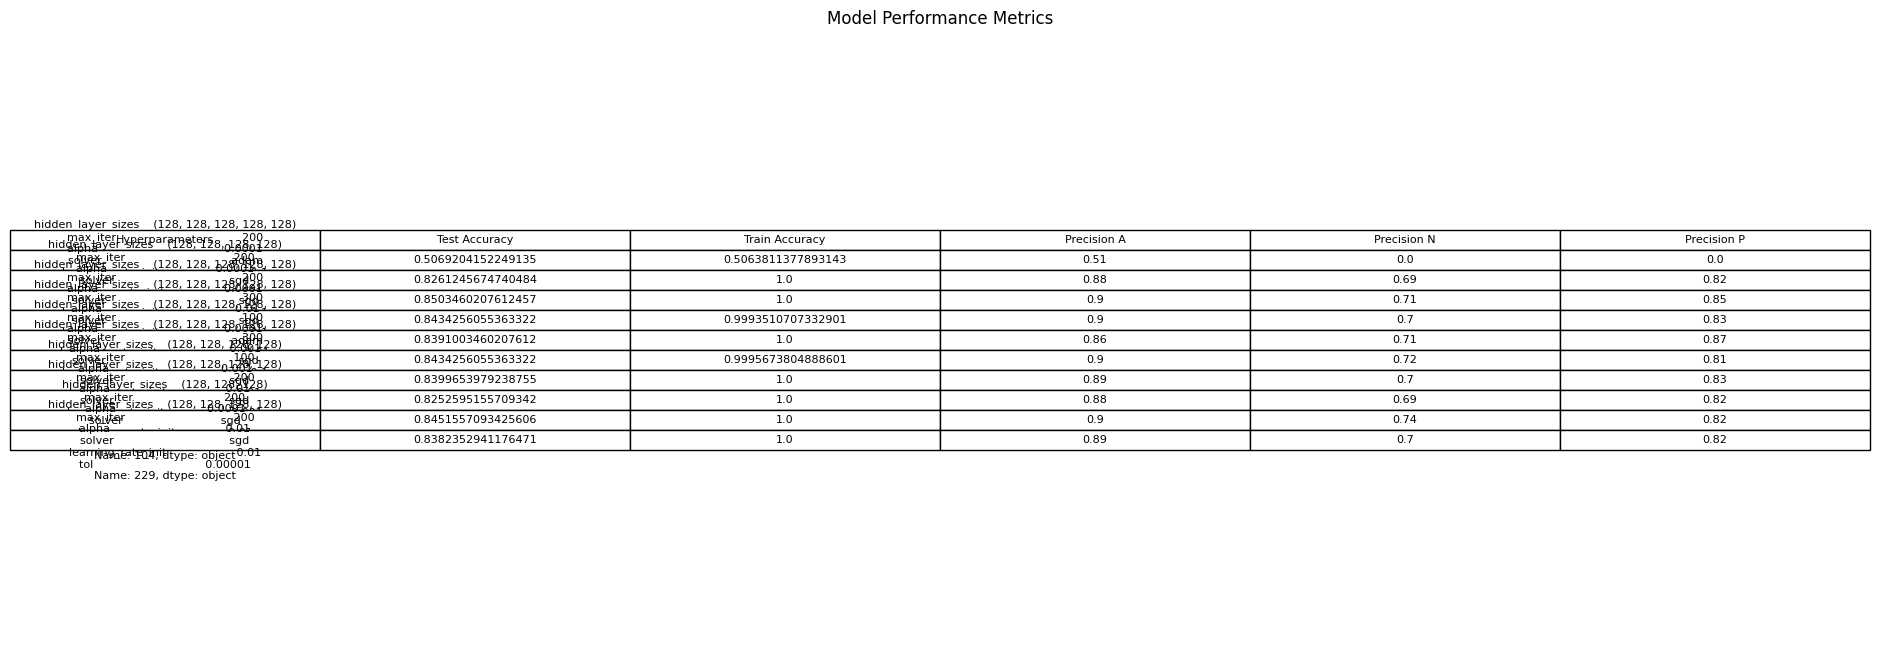

In [4]:
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

DATA_PATH_V1 = "dataset/V1/output"
DATA_PATH_V2 = "dataset/V2/output"

# Prepare the dataset
X_train, X_test, y_train, y_test, le, datasetFeatures = prepare_dataset([DATA_PATH_V1, DATA_PATH_V2])

hyperparameters = {
    'hidden_layer_sizes': [(128, 128, 128), (128, 128, 128, 128), (128, 128, 128, 128, 128)],
    'max_iter': [100, 200, 300],
    'alpha': [0.01, 0.001, 0.0001],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [.001, .01, .1],
    'tol': [1e-4, 1e-5, 1e-6]
}
# Convert to DataFrame and sample 10 random combinations
hyperparameters_df = pd.DataFrame(list(product(*hyperparameters.values())), columns=hyperparameters.keys())
sampled_hyperparameters = hyperparameters_df.sample(10, random_state=42)  # Ensure reproducibility

# Evaluate each hyperparameter set
metrics = []
for index, params in sampled_hyperparameters.iterrows():
    model = MLPClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = model.score(X_test, y_test)
    train_accuracy = model.score(X_train, y_train)
    report = classification_report(y_test, y_pred, target_names=le.inverse_transform(np.unique(y_train)))
    precision_A = float(report.split()[5])
    precision_N = float(report.split()[10])
    precision_P = float(report.split()[15])

    metrics.append((params, test_accuracy, train_accuracy, precision_A, precision_N, precision_P))

# Convert the metrics into a DataFrame for easy viewing
metrics_df = pd.DataFrame(metrics, columns=['Hyperparameters','Test Accuracy', 'Train Accuracy', 'Precision A', 'Precision N', 'Precision P'])

# Save the metrics to a CSV file
metrics_df.to_csv('resources/results/hyperparameters/HyperparameterMetrics.csv', index=False)

# Display the results in a table
fig, ax = plt.subplots(figsize=(20, 12))
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)
plt.title('Model Performance Metrics')

# Save the plot
plt.savefig('resources/results/hyperparameters/HyperparameterMetricsImg.png')
plt.show()


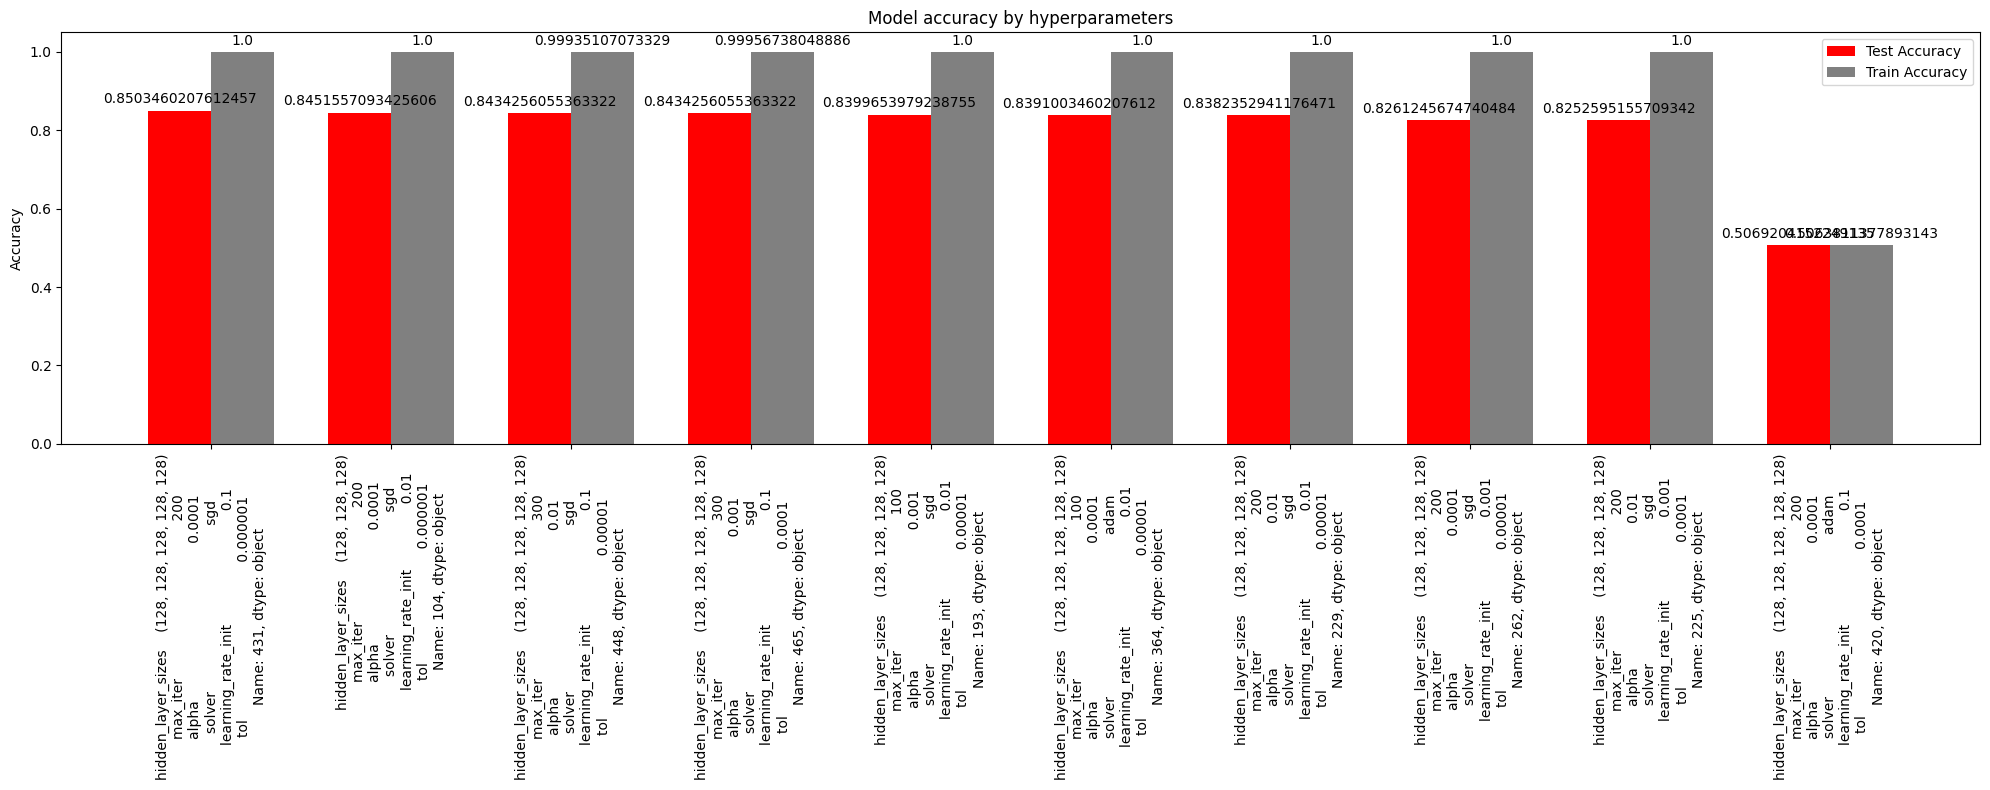

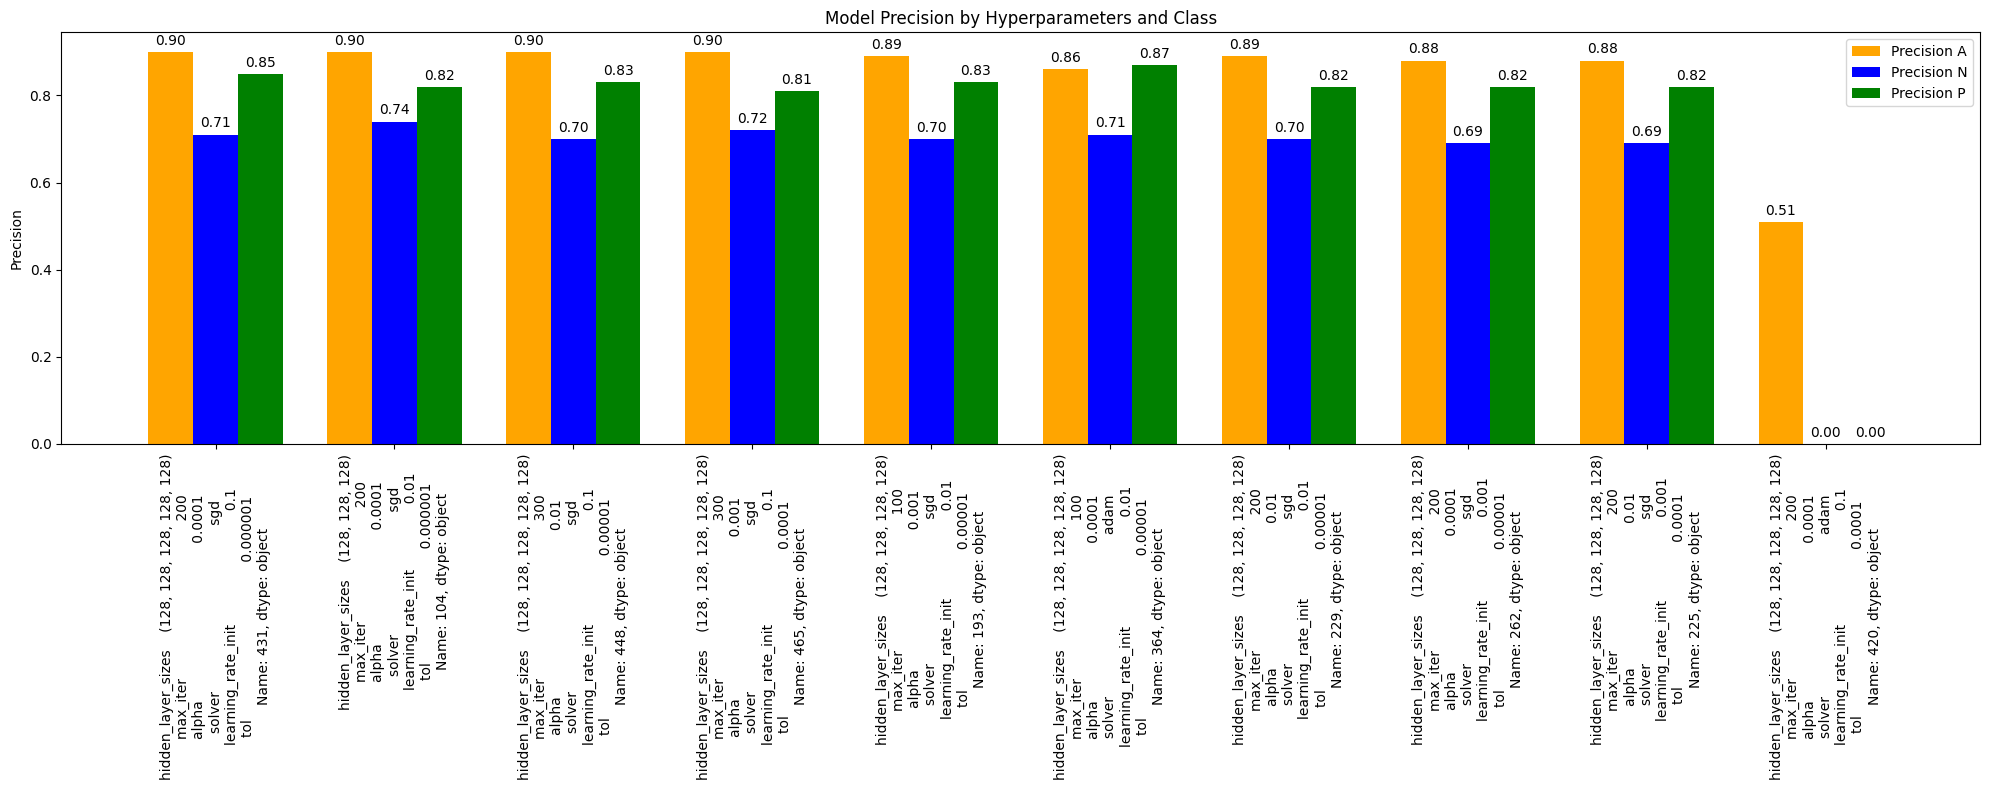

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

metrics_df = pd.read_csv('resources/results/hyperparameters/HyperparameterMetrics.csv')

"""Plotting the Accuracy by Hyperparameters"""

metrics_df = metrics_df.sort_values(by='Test Accuracy', ascending=False)
metrics_df = metrics_df.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(20, 8))  

width = 0.35 
indices = range(len(metrics_df)) 

rects1 = ax.bar(indices, metrics_df['Test Accuracy'], width, label='Test Accuracy', color = 'red')
rects2 = ax.bar([p + width for p in indices], metrics_df['Train Accuracy'], width, label='Train Accuracy', color = 'gray')

ax.set_ylabel('Accuracy')
ax.set_title('Model accuracy by hyperparameters')
ax.set_xticks([p + width / 2 for p in indices])
ax.set_xticklabels(metrics_df['Hyperparameters'], rotation=90)
ax.legend()

ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig('resources/results/hyperparameters/AccuracyByHyperparameters.png')
plt.show()

"""Plotting the Precision by Hyperparameters and Class"""

fig, ax = plt.subplots(figsize=(20, 8))

width = 0.25
indices = range(len(metrics_df)) 

rects1 = ax.bar(indices, metrics_df['Precision A'], width, label='Precision A', color='orange')
rects2 = ax.bar([p + width for p in indices], metrics_df['Precision N'], width, label='Precision N', color='blue')
rects3 = ax.bar([p + width * 2 for p in indices], metrics_df['Precision P'], width, label='Precision P', color='green')

ax.set_ylabel('Precision')
ax.set_title('Model Precision by Hyperparameters and Class')
ax.set_xticks([p + width for p in indices])
ax.set_xticklabels(metrics_df['Hyperparameters'], rotation=90)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.savefig('resources/results/hyperparameters/PrecisionByClassAndHyperparameters.png')
plt.show()

<h2 style='text-align:center' id='training'> <strong>6. Training methodology</strong> </h2>

<h3><strong>Number of neurons and hidden layers</strong></h3>
<p>The architecture of our multi-layer perceptron (MLP) consists of three hidden layers, each with 128 neurons. This configuration was determined after several preliminary tests that aimed to find a balance between model complexity and computational efficiency. A model with too few neurons might not capture the detailed features necessary for accurate classification, whereas too many neurons can lead to overfitting, especially when the data set is not large enough to support such complexity. The choice of 128 neurons per layer is a common practice in deep learning for tasks involving moderate complexity, providing enough capacity to learn significant patterns in the image data without being overly demanding on resources.</p>

<h3><strong>Number of epochs</strong></h3>
<p>We have chosen to limit the training to 100 epochs. This number strikes a balance between adequate exposure of the training data to the learning process and computational efficiency. It provides a reasonable timeframe for the weights of the network to adjust and converge towards a good fit for the training data. Additionally, to guard against overfitting—a common risk with more extended training periods—we consider implementing an early stopping mechanism. This approach monitors the validation loss and stops the training process if the validation loss starts to increase, indicating that the model is beginning to memorize the training data rather than learning generalizable patterns.</p>

<h3><strong>Learning rate</strong></h3>
<p>The initial learning rate is set at 0.001. This value is small enough to ensure that the model does not miss any local minima in the loss landscape, yet it's sufficiently large to provide faster convergence, saving time and resources during training. We employ the 'adam' optimizer, which is well-regarded for its efficiency in handling sparse gradients and adaptive learning rate capabilities. Adam adjusts the learning rate dynamically based on the average of the second moments of the gradients (variance), which helps in fine-tuning the steps taken towards the minimum loss.</p>

<h3><strong>Momentum</strong></h3>
<p>While our setup uses the 'adam' optimizer, it inherently manages momentum through its internal use of moving averages of the gradient (beta_1) and squared gradients (beta_2). The default values for these parameters—0.9 for beta_1 and 0.999 for beta_2—offer a balance between stability and responsiveness. These settings help in smoothing out the updates made to the weights, thereby enhancing the convergence speed and stability of the learning process. The effective management of momentum prevents the optimizer from being stuck in local minima and accelerates convergence towards the global minimum.</p>

<p>By carefully choosing these parameters, our goal is to develop a neural network that is both efficient and powerful enough to accurately classify images based on the presence or absence of people, leveraging the learned features to make robust predictions.</p>


In [6]:
FINAL_HYPERPARAMETERS = {
    'hidden_layer_sizes': (128, 128, 128),
    'max_iter': 100,
    'alpha': 0.01,
    'solver': 'adam',
    'verbose': False,
    'random_state': 42,
    'learning_rate_init': .001,
    'tol': 1e-4
}

def train_model(X_train, y_train):
    mlp = MLPClassifier(**FINAL_HYPERPARAMETERS)
    mlp.fit(X_train, y_train)

    return mlp

<h2 style='text-align:center' id='model-training'> <strong>7. Training model</strong> </h2>

Calculating feature vectors...
Model saved to model.pkl


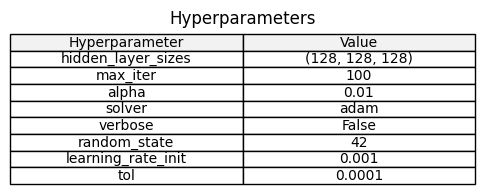

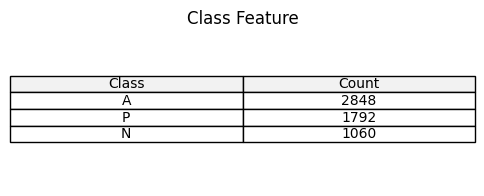

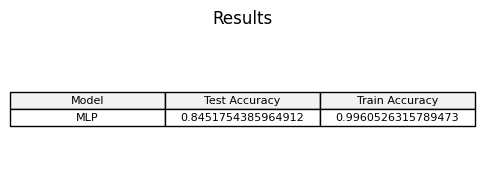

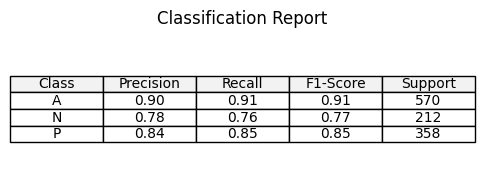

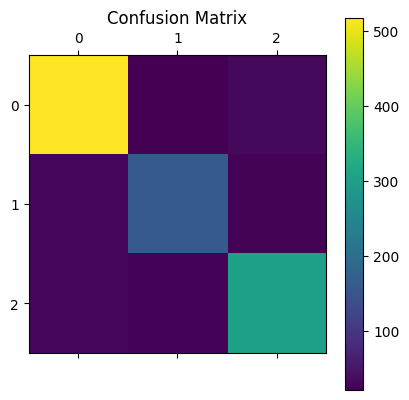

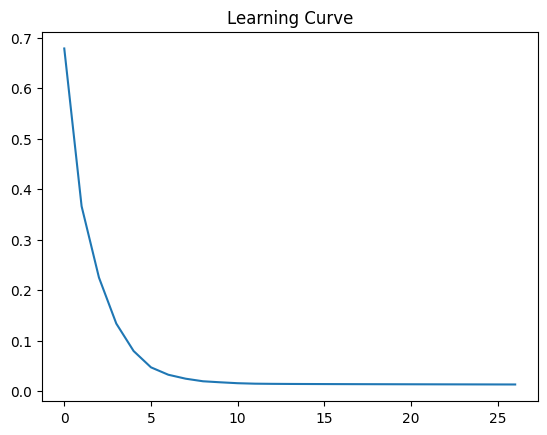

In [7]:
# Define constants for data paths and model file
DATA_PATH_V1 = "dataset/V1/output"
DATA_PATH_V2 = "dataset/V2/output"
MODEL_FILE = 'model.pkl'
RESULTS_PATH = 'resources/results/model/'

# Prepare the dataset
X_train, X_test, y_train, y_test, le, datasetFeatures = prepare_dataset([DATA_PATH_V1, DATA_PATH_V2])

# Train the model
model = train_model(X_train, y_train)

# Evaluate the model
testAccuracy, trainAccuracy = perform_cross_validation(model, X_train, y_train)
classification_report, confusion_matrix = evaluate_model(model, X_test, y_test, le)

# Save the model
joblib.dump(model, MODEL_FILE)
print("Model saved to", MODEL_FILE)

# Get the hyperparameters of the model
hyperparameters = FINAL_HYPERPARAMETERS
hyperparameters = pd.DataFrame(hyperparameters.items(), columns=['Hyperparameter', 'Value'])

# Get the class feature
classFeature = datasetFeatures['Class'].values
classFeature = pd.DataFrame(classFeature, columns=['Class'])
classFeature = classFeature['Class'].value_counts().reset_index()
classFeature.columns = ['Class', 'Count']

# Get the results
results = pd.DataFrame({
    'Model': ['MLP'],
    'Test Accuracy': [testAccuracy],
    'Train Accuracy': [trainAccuracy]
})

# Get the classification report
classification_report = classification_report.split("\n")
classification_report = [line.split() for line in classification_report if line]
classification_report = classification_report[1:-3]
classification_report = pd.DataFrame(classification_report, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])

# Plot the hyperparameters of the model
fig, ax = plt.subplots(figsize=(6, 2))
plt.table(cellText=hyperparameters.values, colLabels=hyperparameters.columns, cellLoc='center', loc='center', colColours=['#f2f2f2', '#f2f2f2'])
plt.axis('off')
plt.title('Hyperparameters')
# Save the plot
plt.savefig(RESULTS_PATH + 'Hyperparameters.png')
plt.show()

# Plot the class feature
fig, ax = plt.subplots(figsize=(6, 2))
plt.table(cellText=classFeature.values, colLabels=classFeature.columns, cellLoc='center', loc='center', colColours=['#f2f2f2', '#f2f2f2'])
plt.axis('off')
plt.title('Class Feature')
# Save the plot
plt.savefig(RESULTS_PATH + 'ClassFeature.png')
plt.show()

# Plot the results
fig, ax = plt.subplots(figsize=(6, 2))
plt.table(cellText=results.values, colLabels=results.columns, cellLoc='center', loc='center', colColours=['#f2f2f2', '#f2f2f2', '#f2f2f2']) 
plt.axis('off')
plt.title('Results')
# Save the plot
plt.savefig(RESULTS_PATH + 'Results.png')
plt.show()

# Plot the classification report
fig, ax = plt.subplots(figsize=(6, 2))
plt.table(cellText=classification_report.values, colLabels=classification_report.columns, cellLoc='center', loc='center', colColours=['#f2f2f2']*5)
plt.axis('off')
plt.title('Classification Report')
# Save the plot
plt.savefig(RESULTS_PATH + 'ClassificationReport.png')
plt.show()

# Plot the confusion matrix
plt.matshow(confusion_matrix)
plt.colorbar()
plt.title('Confusion Matrix')
# Save the plot
plt.savefig(RESULTS_PATH + 'ConfusionMatrix.png')
plt.show()

# Plot the learning curve
plt.plot(model.loss_curve_)
plt.title('Learning Curve')
# Save the plot
plt.savefig(RESULTS_PATH + 'LearningCurve.png')
plt.show()

<h2 style='text-align:center' id='using-app'> <strong>8. Using the model</strong> </h2>

In [9]:
from UI import App
import tkinter as tk

root = tk.Tk()
root.state('zoomed')
root.configure(bg='white')
app = App(root)
root.mainloop()

<h2 style='text-align:center' id='results-app'> <strong>9. Results using the APP </strong> </h2>

<h3 style = "text-align:center"> <strong>Dataset | Internet</strong> </h3>

<div style = "display: flex; justify-content: space-around;">
    <div style = "width: 45%">
        <img src = "resources/results/app/example1.png" style = "width: 24%, center;"/>
        <p style = "text-align: center;"> <strong>Example 1</strong> </p>
        <img src = "resources/results/app/example2.png" style = "width: 24%, center;"/>
        <p style = "text-align: center;"> <strong>Example 2</strong> </p>
        <img src = "resources/results/app/example3.png" style = "width: 24%, center;"/>
        <p style = "text-align: center;"> <strong>Example 3</strong> </p>
        <img src = "resources/results/app/example4.png" style = "width: 24%, center;"/>
        <p style = "text-align: center;"> <strong>Example 4</strong> </p>
    </div>
    <div style = "width: 45%">
        <img src = "resources/results/app/example5.png" style = "width: 24%, center;"/>
        <p style = "text-align: center;"> <strong>Example 5</strong> </p>
        <img src = "resources/results/app/example6.png" style = "width: 24%, center;"/>
        <p style = "text-align: center;"> <strong>Example 6</strong> </p>
        <img src = "resources/results/app/example7.png" style = "width: 24%, center;"/>
        <p style = "text-align: center;"> <strong>Example 7</strong> </p>
        <img src = "resources/results/app/example8.png" style = "width: 24%, center;"/>
        <p style = "text-align: center;"> <strong>Example 8</strong> </p>
    </div>
</div>

<h3 style = "text-align:center"> <strong>Best result</strong> </h3>

<img src = "resources/results/app/example3.png" style = "width: 50%, center;"/>